# Введение в машинное обучение

In [19]:
import pandas as pd
import numpy as np
import time

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('./data/cs-training.csv', sep=',')

In [22]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Описание данных

* SeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse 
* RevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
* age - Age of borrower in years
* NumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* DebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income
* MonthlyIncome - Monthly income
* NumberOfOpenCreditLinesAndLoans - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
* NumberOfTimes90DaysLate - Number of times borrower has been 90 days or more past due.
* NumberRealEstateLoansOrLines - Number of mortgage and real estate loans including home equity lines of credit
* NumberOfTime60-89DaysPastDueNotWorse - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
* NumberOfDependents - Number of dependents in family excluding themselves (spouse, children etc.)

* SeriousDlqin2yrs - Флаг выхода на просрочку через 90 дней
* RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
* age - Возраст заемщика в годах
* NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
* DebtRatio - Ежемесячные платежи по долгам, алименты, прожиточные расходы, деленные на месячный валовый доход
* MonthlyIncome - Ежемесячный доход
* NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (рассрочка, например, автокредит или закладная) и кредитные линии (например, кредитные карты)
* NumberOfTimes90DaysLate - Сколько раз заемщик просрочил выплату на 90 дней и более.
* NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
* NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
* NumberOfDependents - Количество иждивенцев в семье, исключая себя (супруга, дети и т.д.)

# Подготавливаем выборку

Для простоты убираем все отсутствующие признаки из dataset'a

In [23]:
df = df.dropna()

In [24]:
X = df.as_matrix(columns=df.columns[1:])

In [25]:
y = df.as_matrix(columns=df.columns[:1])
y = y.reshape(y.shape[0])

### В качестве моделей будем использовать DecisionTreeClassifier и RandomForestClassifier

In [26]:
from sklearn.linear_model import LogisticRegression as LR, Ridge

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
from sklearn import metrics

In [29]:
from sklearn.model_selection import KFold

In [30]:
gkf = KFold(n_splits=5, shuffle=True)

In [31]:
learner = LR(C=0.05, class_weight='balanced')

In [32]:
for train, test in gkf.split(X, y):
    t1 = time.time()
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    learner.fit(X_train, y_train)
    print(roc_auc_score(y_score=learner.predict_proba(X_test)[:,1], y_true=y_test))
    print("%.3fsec" % (time.time() - t1))
    learner.fit

0.790659054423
0.882sec
0.798638507148
0.698sec
0.805664154988
0.717sec
0.788919419606
0.463sec
0.786505910716
0.597sec


# Отрисует ROC curve

In [33]:
fpr, tpr, _ = metrics.roc_curve(y_score=learner.predict_proba(X_test)[:,1], y_true=y_test)

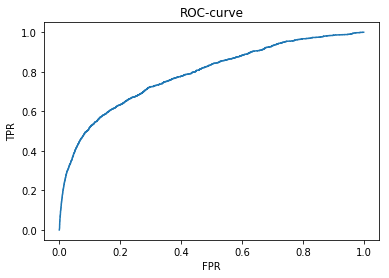

In [34]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.show()